# TITANIC SURVIVAL PREDICTION

## Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [10]:
dataset = pd.read_csv("titanic.csv")

In [11]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocessing

In [12]:
col_required = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
df = pd.read_csv('titanic.csv', usecols = col_required)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S


In [14]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [15]:
df.shape

(418, 7)

In [16]:
df.dropna(subset = ['Age'], inplace = True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [18]:
df.shape

(332, 7)

## Creating Bins for Age column

In [19]:
age_bin = [0, 15, 30, 50, 80]
age_label = ['Children', 'Young', 'Mid_Age', 'Senior']
df['Age'] = pd.cut(df['Age'], bins = age_bin, labels = age_label)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,Mid_Age,0,0,Q
1,1,3,female,Mid_Age,1,0,S
2,0,2,male,Senior,0,0,Q
3,0,3,male,Young,0,0,S
4,1,3,female,Young,1,1,S


In [20]:
df_survived = df[df['Survived'] == 1]

In [21]:
df_survived.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,3,female,Mid_Age,1,0,S
4,1,3,female,Young,1,1,S
6,1,3,female,Young,0,0,Q
8,1,3,female,Young,0,0,C
12,1,1,female,Young,1,0,S


### Number of people survived grouped by Pclass

In [22]:
pclass_survived = pd.DataFrame(df['Pclass'].value_counts()).reset_index()
pclass_survived.columns = ['Class', 'Count']
pclass_survived

,Class,Count
0,3,146
1,1,98
2,2,88


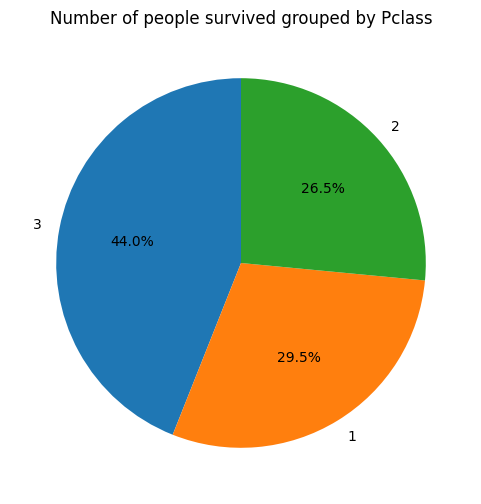

In [23]:
plt.figure(figsize = (6, 6))
plt.pie(pclass_survived['Count'], labels = pclass_survived['Class'], autopct = '%1.1f%%', startangle = 90)
plt.title("Number of people survived grouped by Pclass")
plt.show()

### Number of people survived grouped by Sex

In [24]:
sex_survived = pd.DataFrame(df['Sex'].value_counts()).reset_index()
sex_survived.columns = ['Sex', 'Count']
sex_survived

,Sex,Count
0,male,205
1,female,127


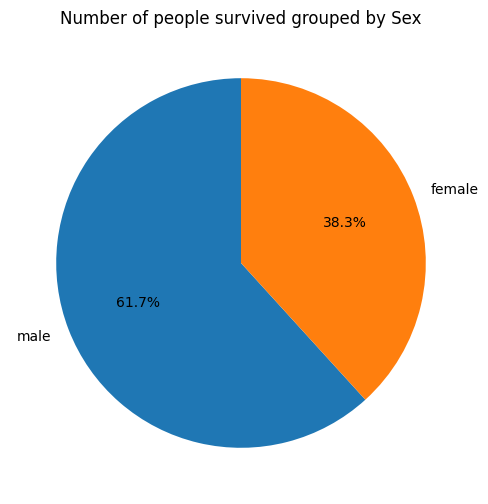

In [25]:
plt.figure(figsize = (6, 6))
plt.pie(sex_survived['Count'], labels = sex_survived['Sex'], autopct = '%1.1f%%', startangle = 90)
plt.title("Number of people survived grouped by Sex")
plt.show()

### Number of people survived grouped by age

In [26]:
age_survived = pd.DataFrame(df['Age'].value_counts()).reset_index()
age_survived.columns = ['Category', 'Count']
age_survived

,Category,Count
0,Young,168
1,Mid_Age,101
2,Children,32
3,Senior,31


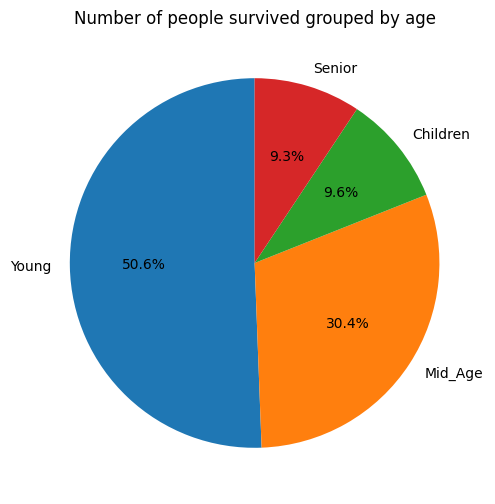

In [27]:
plt.figure(figsize = (6, 6))
plt.pie(age_survived['Count'], labels = age_survived['Category'], autopct = '%1.1f%%', startangle = 90)
plt.title("Number of people survived grouped by age")
plt.show()

### Number of people survived grouped by SibSp


In [28]:
sibsp_survived = pd.DataFrame(df['SibSp'].value_counts()).reset_index()
sibsp_survived.columns = ['SibSp', 'Count']
sibsp_survived

,SibSp,Count
0,0,214
1,1,97
2,2,11
3,3,4
4,4,4
5,5,1
6,8,1


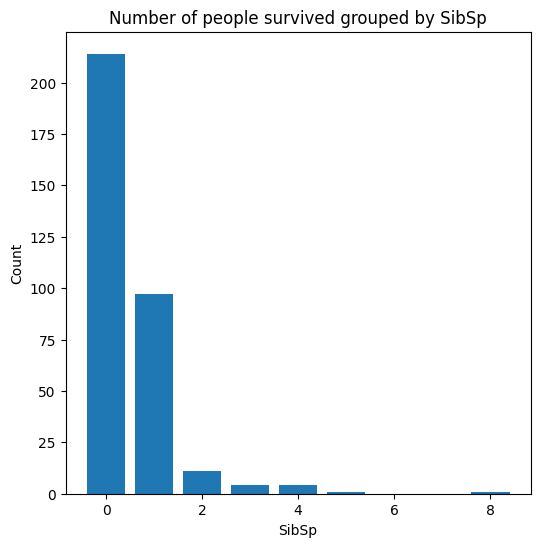

In [29]:
plt.figure(figsize=(6, 6))
plt.bar(sibsp_survived['SibSp'], sibsp_survived['Count'])
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title("Number of people survived grouped by SibSp")
plt.show()

### Number of people survived grouped by Parch

In [30]:
parch_survived = pd.DataFrame(df['Parch'].value_counts()).reset_index()
parch_survived.columns = ['Parch', 'Count']
parch_survived

,Parch,Count
0,0,247
1,1,50
2,2,29
3,3,3
4,4,1
5,6,1
6,5,1


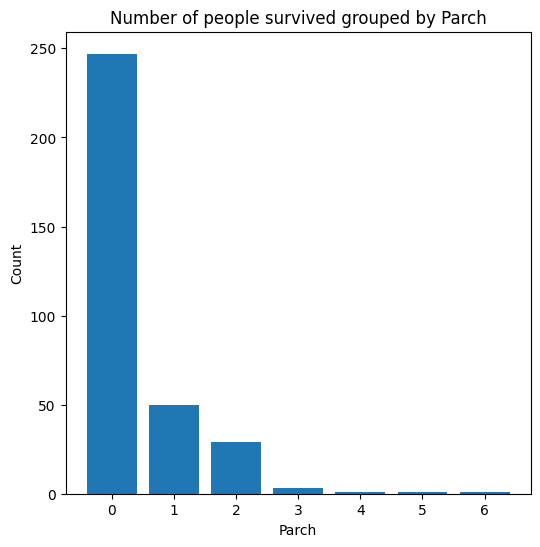

In [31]:
plt.figure(figsize=(6, 6))
plt.bar(parch_survived['Parch'], parch_survived['Count'])
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title("Number of people survived grouped by Parch")
plt.show()

### Number of people survived grouped by Embarked

In [32]:
embarked_survived = pd.DataFrame(df['Embarked'].value_counts()).reset_index()
embarked_survived.columns = ['Embarked', 'Count']
embarked_survived

,Embarked,Count
0,S,228
1,C,82
2,Q,22


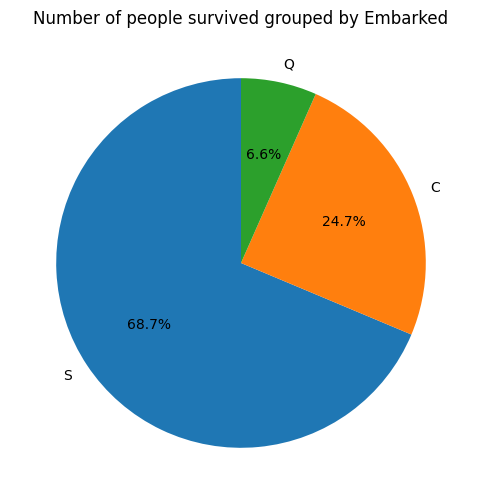

In [33]:
plt.figure(figsize = (6, 6))
plt.pie(embarked_survived['Count'], labels = embarked_survived['Embarked'], autopct = '%1.1f%%', startangle = 90)
plt.title("Number of people survived grouped by Embarked")
plt.show()